In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
# enables inline plots
%matplotlib inline

# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

# check version of libraries
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Python Version: 3.6.1 |Anaconda custom (x86_64)| (default, Mar 22 2017, 19:25:17) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas version: 0.19.2
Numpy version: 1.12.1


In [6]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [7]:
ls -l

total 3672
-rw-r--r--  1 eastblue  staff    93132 Apr  9 15:00 1_pandas_jeopardy_example.ipynb
-rw-r--r--  1 eastblue  staff    10389 Mar 25 23:34 2_pandas_olive_questions.ipynb
-rw-r--r--  1 eastblue  staff    14705 Apr  9 23:48 3_pandas_olive_answers_andrew.ipynb
-rw-r--r--  1 eastblue  staff    66148 Apr 10 00:45 Worked Example 1.ipynb
-rw-r--r--  1 eastblue  staff  1651525 Mar 25 23:34 jeopardy.csv
-rw-r--r--  1 eastblue  staff    28995 Mar 25 23:34 olive.csv


In [8]:
#read csv in current directory, assigns to 'df' without unicode errors
df = pd.read_csv('jeopardy.csv', encoding = 'ISO-8859-1')

### Exploring Data
Functions used to explore data.  Use help() to get arguments
* df.shape() - (numrows, numcolumns)
* df.info() - specify verbose, buf, or 
* df.head() - specify the number of entries
* df.tail() - epxecify the number of entries
* df.columns - lists columns of the data frame
* df.values - lists values of a given column
* df.dtype - lists data type
* df.rename

In [9]:
# (numrows, numcolumns)
df.shape

(10999, 7)

In [10]:
df.head(3)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona


In [11]:
df.tail(3)

,Show Number,Air Date,Round,Category,Value,Question,Answer
10996,4362,7/15/03,Double Jeopardy!,TELEVISION,"$1,600","She's the ""Night Court"" actress seen here",Markie Post
10997,4362,7/15/03,Double Jeopardy!,INVENTIVE MINDS,"$1,600",In 1952 he & Charles Bowman joined forces to d...,Orville Redenbacher
10998,4362,7/15/03,Double Jeopardy!,REFRESHER COURSE,"$1,600","Lemon juice, sugar, gin, club soda & an egg go...",royal gin fizz


In [12]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 7 columns):
Show Number    10999 non-null int64
Air Date       10999 non-null object
Round          10999 non-null object
Category       10999 non-null object
Value          10999 non-null object
Question       10999 non-null object
Answer         10999 non-null object
dtypes: int64(1), object(6)
memory usage: 601.6+ KB


### Summarize Data
df.describe() - args: data, index, columns, dtype, copy

In [13]:
df.describe()

,Show Number
count,10999.000
mean,4308.181
std,1397.758
min,62.000
25%,3409.000
50%,4541.000
75%,5431.000
max,6294.000


In [14]:
df['Question'].describe()

count                                                 10999
unique                                                10997
top       "His pride had cast him out from heaven, with ...
freq                                                      2
Name: Question, dtype: object

In [15]:
df['Round'].unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!'], dtype=object)

In [16]:
df.groupby('Round').count()

,Show Number,Air Date,Category,Value,Question,Answer
Round,,,,,,
Double Jeopardy!,5382,5382,5382,5382,5382,5382
Final Jeopardy!,183,183,183,183,183,183
Jeopardy!,5434,5434,5434,5434,5434,5434


### Creating new columns & Cleaning Data

In [17]:
# Creates a new column, labeled Dollar Amt, with the same values as 'value'
df['Dollar_Amt'] = df['Value']

In [18]:
df['Dollar_Amt'].replace(regex=True,inplace=True,to_replace=r'\$',value=r'')

df.head(3)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Dollar_Amt
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,200


In [19]:
df.tail(3)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Dollar_Amt
10996,4362,7/15/03,Double Jeopardy!,TELEVISION,"$1,600","She's the ""Night Court"" actress seen here",Markie Post,"1,600"
10997,4362,7/15/03,Double Jeopardy!,INVENTIVE MINDS,"$1,600",In 1952 he & Charles Bowman joined forces to d...,Orville Redenbacher,"1,600"
10998,4362,7/15/03,Double Jeopardy!,REFRESHER COURSE,"$1,600","Lemon juice, sugar, gin, club soda & an egg go...",royal gin fizz,"1,600"


In [20]:
df['Dollar_Amt'] = df['Dollar_Amt'].str.replace(',', '')
df.tail(2)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Dollar_Amt
10997,4362,7/15/03,Double Jeopardy!,INVENTIVE MINDS,"$1,600",In 1952 he & Charles Bowman joined forces to d...,Orville Redenbacher,1600
10998,4362,7/15/03,Double Jeopardy!,REFRESHER COURSE,"$1,600","Lemon juice, sugar, gin, club soda & an egg go...",royal gin fizz,1600


In [21]:
# create a new column which we want to be numeric
df['Dollar_Amt_n'] = df['Dollar_Amt']

# check data types
df.dtypes

Show Number      int64
Air Date        object
Round           object
Category        object
Value           object
Question        object
Answer          object
Dollar_Amt      object
Dollar_Amt_n    object
dtype: object

In [22]:
df['Dollar_Amt_n'].describe()

count     10999
unique       52
top         400
freq       2144
Name: Dollar_Amt_n, dtype: object

In [23]:
df['Dollar_Amt_n'].unique()

array(['200', '400', '600', '800', '2000', '1000', '1200', '1600', '3200',
       'None', '5000', '100', '300', '500', '1500', '4800', '1800', '1100',
       '2200', '3400', '3000', '4000', '6800', '1900', '3100', '700',
       '1400', '2800', '8000', '6000', '2400', '12000', '3800', '2500',
       '6200', '10000', '7000', '1492', '7400', '1300', '7200', '2600',
       '3300', '5400', '4500', '2100', '900', '3600', '2127', '367',
       '4400', '3500'], dtype=object)

In [24]:
# Change data type to numeric type
df['Dollar_Amt_n'] = pd.to_numeric(df['Dollar_Amt_n'], errors='coerce')

df.dtypes

Show Number       int64
Air Date         object
Round            object
Category         object
Value            object
Question         object
Answer           object
Dollar_Amt       object
Dollar_Amt_n    float64
dtype: object

In [25]:
df['Dollar_Amt_n'].unique()

array([   200.,    400.,    600.,    800.,   2000.,   1000.,   1200.,
         1600.,   3200.,     nan,   5000.,    100.,    300.,    500.,
         1500.,   4800.,   1800.,   1100.,   2200.,   3400.,   3000.,
         4000.,   6800.,   1900.,   3100.,    700.,   1400.,   2800.,
         8000.,   6000.,   2400.,  12000.,   3800.,   2500.,   6200.,
        10000.,   7000.,   1492.,   7400.,   1300.,   7200.,   2600.,
         3300.,   5400.,   4500.,   2100.,    900.,   3600.,   2127.,
          367.,   4400.,   3500.])

In [26]:
df['Dollar_Amt_n'].describe()

count    10816.000
mean       761.001
std        643.154
min        100.000
25%        400.000
50%        600.000
75%       1000.000
max      12000.000
Name: Dollar_Amt_n, dtype: float64

### Plotting

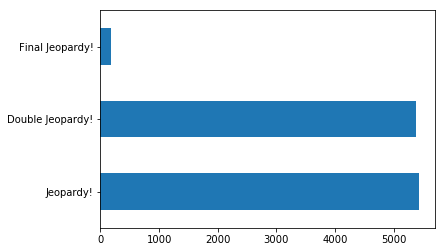

In [27]:
# do barplot of a categorical variable
df['Round'].value_counts().plot('barh')

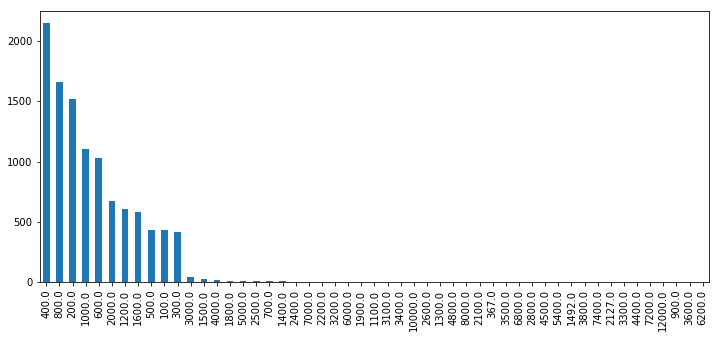

In [28]:
# do barplot of a numerical variable
fig = plt.figure(figsize=(12,5))

df['Dollar_Amt_n'].value_counts().plot('bar')

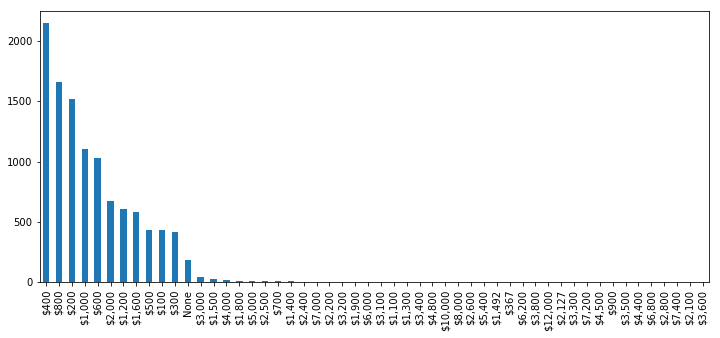

In [30]:
# do barplot of a categorical variable
fig = plt.figure(figsize=(12,5))

df['Value'].value_counts().plot('bar')

In [32]:
df.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer', 'Dollar_Amt', 'Dollar_Amt_n'],
      dtype='object')

In [36]:
df['Value'].unique()

array(['$200', '$400', '$600', '$800', '$2,000', '$1,000', '$1,200',
       '$1,600', '$3,200', 'None', '$5,000', '$100', '$300', '$500',
       '$1,500', '$4,800', '$1,800', '$1,100', '$2,200', '$3,400',
       '$3,000', '$4,000', '$6,800', '$1,900', '$3,100', '$700', '$1,400',
       '$2,800', '$8,000', '$6,000', '$2,400', '$12,000', '$3,800',
       '$2,500', '$6,200', '$10,000', '$7,000', '$1,492', '$7,400',
       '$1,300', '$7,200', '$2,600', '$3,300', '$5,400', '$4,500',
       '$2,100', '$900', '$3,600', '$2,127', '$367', '$4,400', '$3,500'], dtype=object)